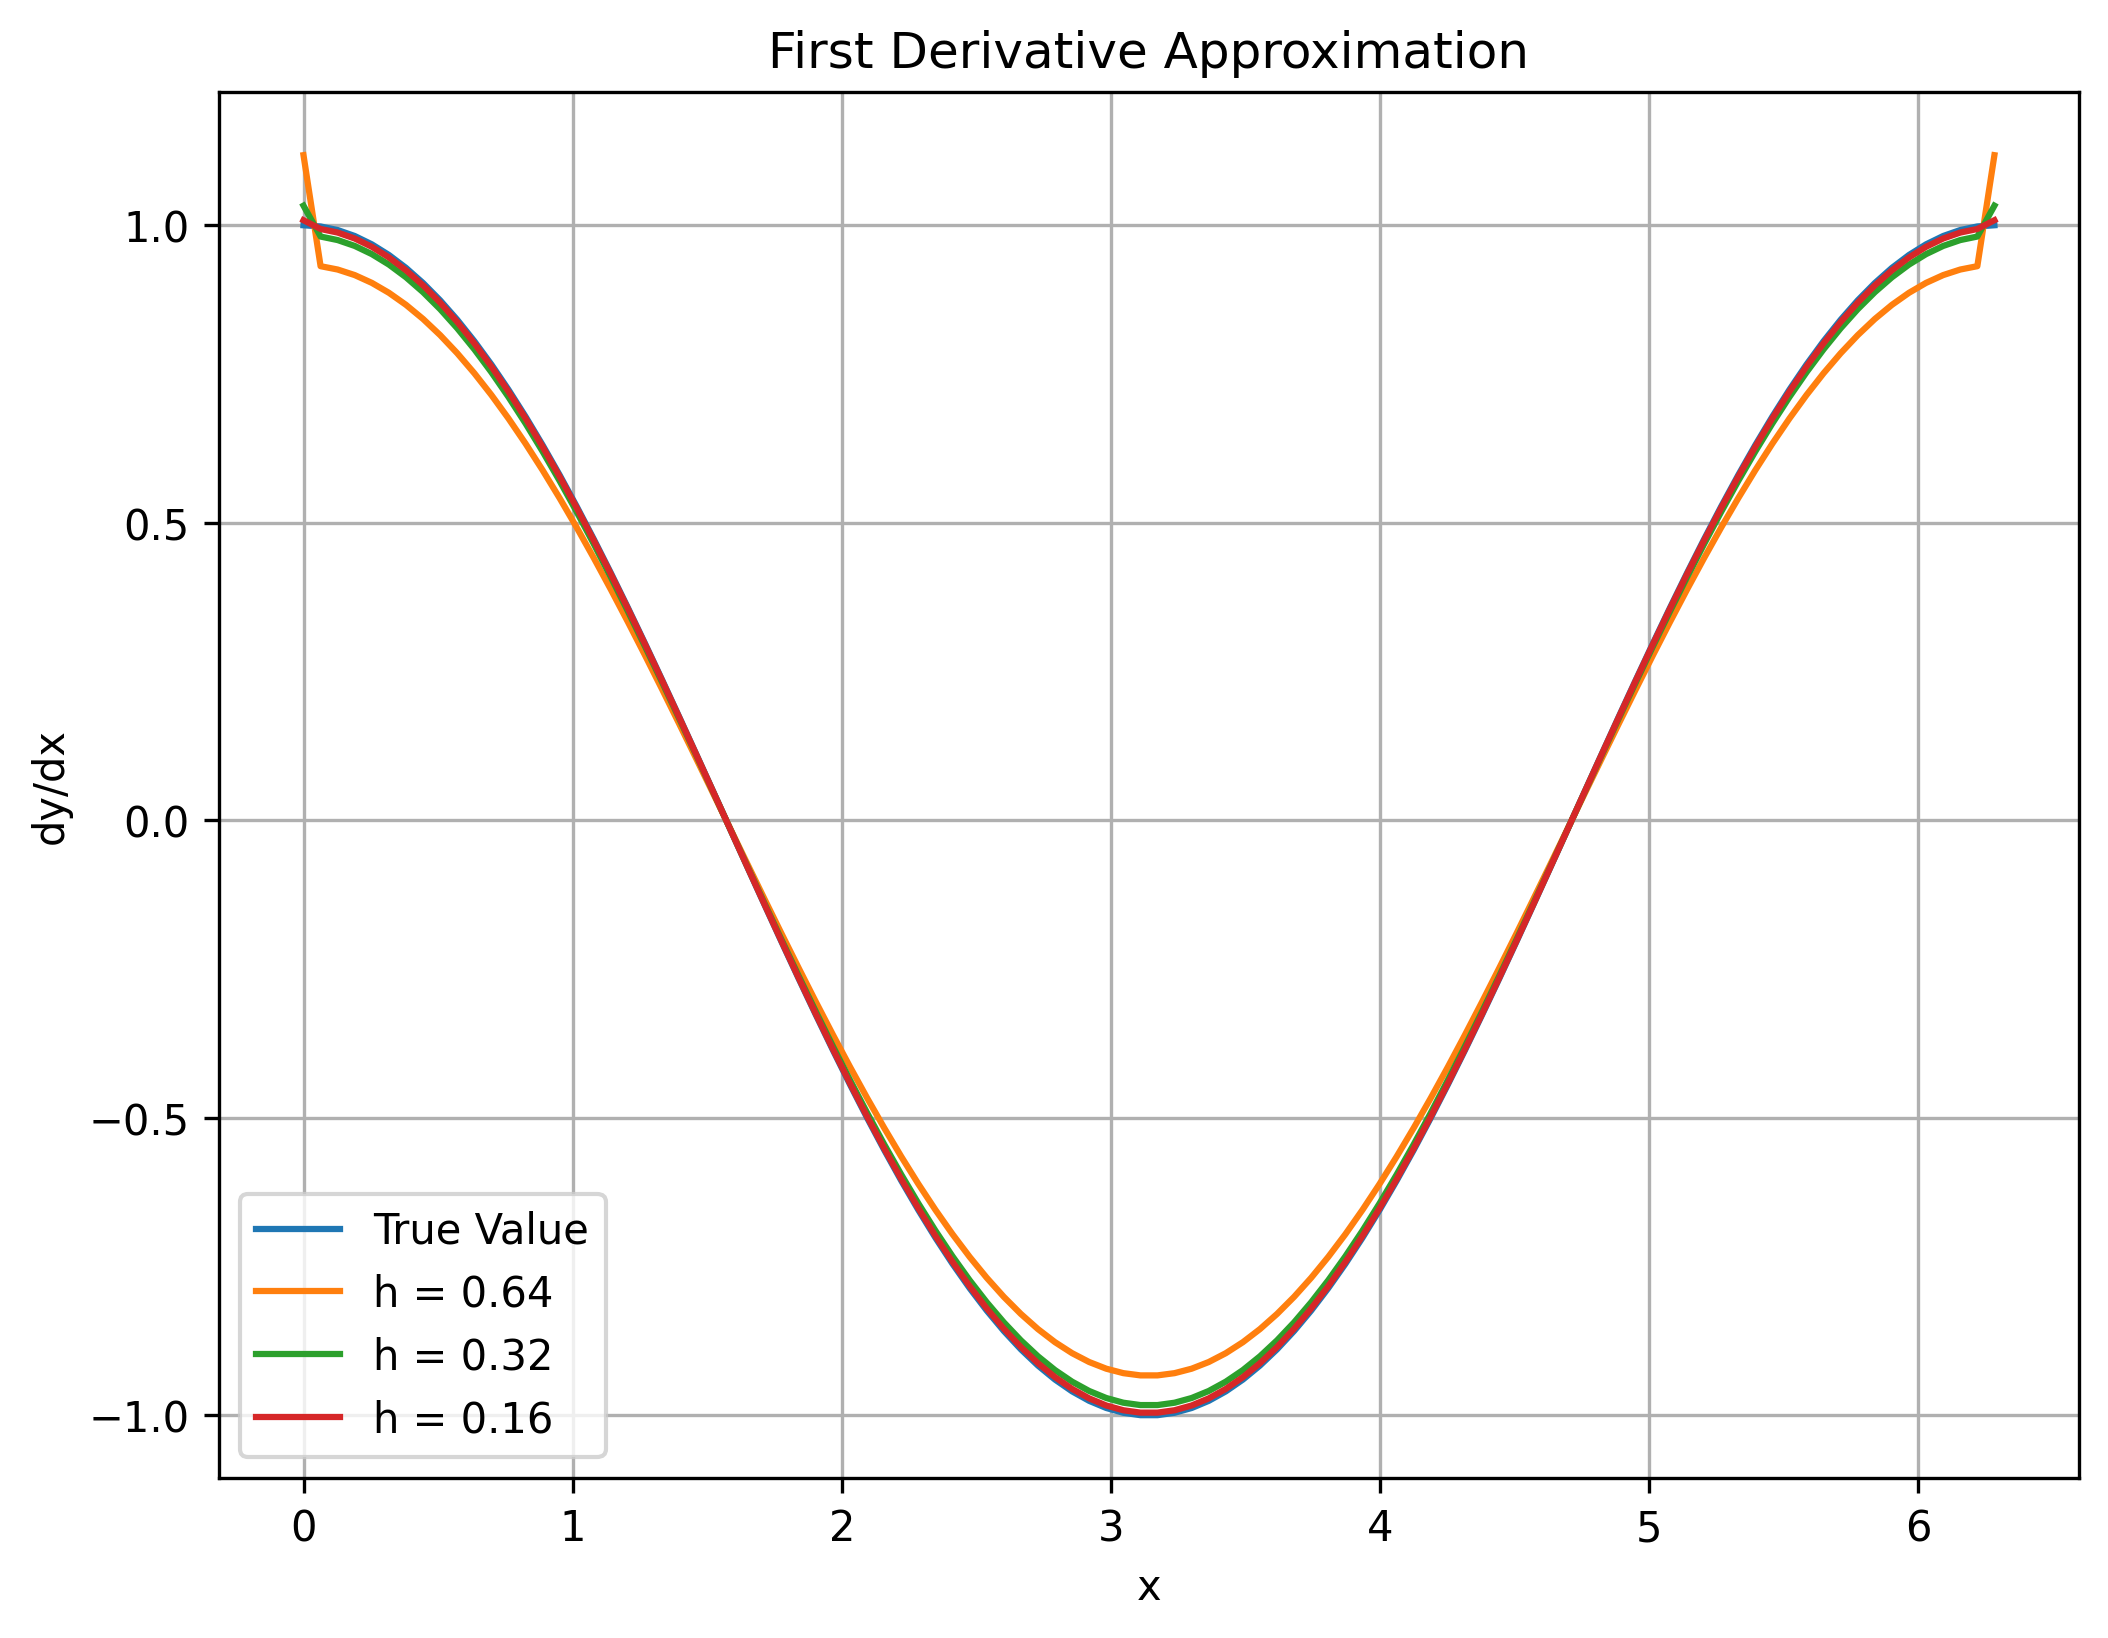

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def my_fun(x):
    return np.sin(x)

def forward_difference(f, x, h):
    return (-3 * f(x) + 4 * f(x + h) - f(x + 2 * h)) / (2 * h)

def backward_difference(f, x, h):
    return (3 * f(x) - 4 * f(x - h) + f(x - 2 * h)) / (2 * h)

def central_difference(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

def differentiate(f, x, h):
    y_diff = np.zeros_like(x)
    for i in range(0, len(x)):
        if i == 0:
            y_diff[i] = forward_difference(f, x[i], h)
        elif i == len(x) - 1:
            y_diff[i] = backward_difference(f, x[i], h)
        else:
            y_diff[i] = central_difference(f, x[i], h)
    return y_diff

def plot_graphs(x, y_true, h_values):
    plt.figure(figsize=(8, 6), dpi=300)
    plt.plot(x, y_true, label='True Value')
    for h in h_values:
        y_diff = differentiate(my_fun, x, h)
        plt.plot(x, y_diff, label=f'h = {h}')
    plt.xlabel('x')
    plt.ylabel('dy/dx')
    plt.title('First Derivative Approximation')
    plt.legend()
    plt.grid(True)
    plt.show()

x = np.linspace(0, 2 * np.pi, 100)
y_true = np.cos(x)
h_values = [0.64, 0.32, 0.16]
plot_graphs(x, y_true, h_values)

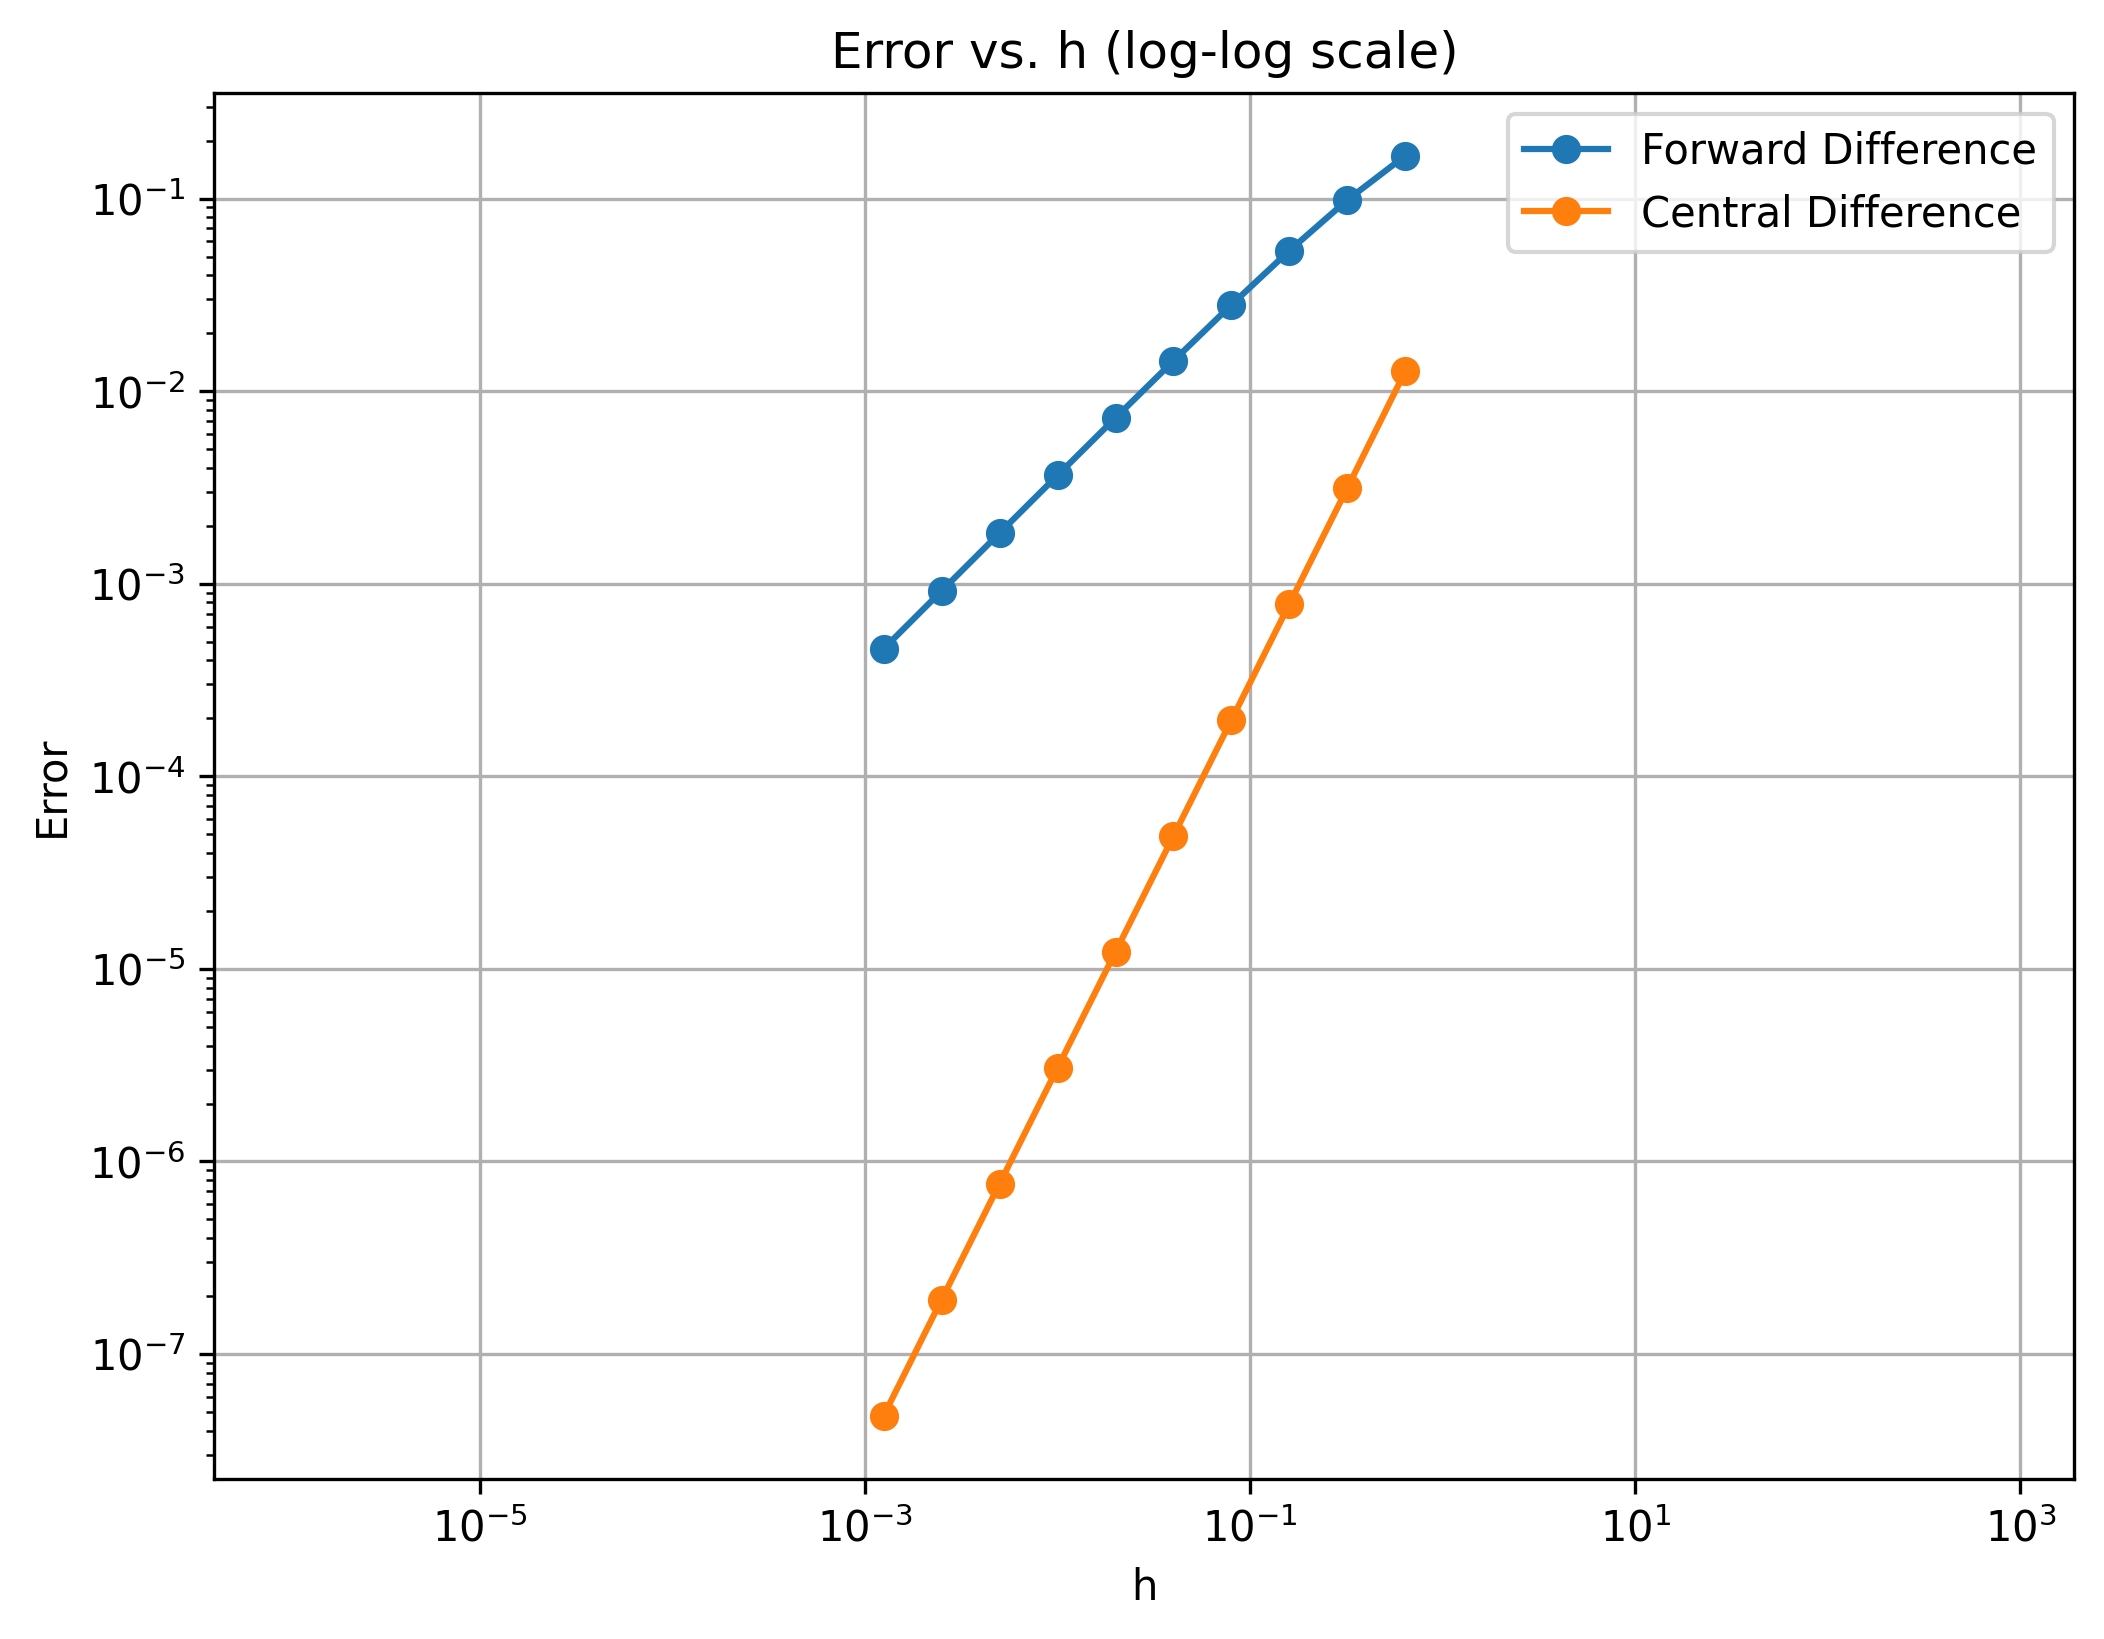

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def my_fun(x):
    return np.exp(-x)

def my_fun_second_derivative(x):
    return np.exp(-x)

def forward_difference(f, x, h):
    return (f(x + 2*h) - 2 * f(x + h) + f(x)) / h**2

def central_difference(f, x, h):
    return (f(x + h) - 2 * f(x) + f(x - h)) / h**2

def calculate_errors(f, f_second_derivative, x, h_values):
    forward_errors = []
    central_errors = []
    for h in h_values:
        forward_error = abs(forward_difference(f, x, h) - f_second_derivative(x))
        central_error = abs(central_difference(f, x, h) - f_second_derivative(x))
        forward_errors.append(forward_error)
        central_errors.append(central_error)
    return forward_errors, central_errors

def plot_errors(h_values, forward_errors, central_errors):
    plt.figure(figsize=(8, 6), dpi=300)
    plt.loglog(h_values, forward_errors, 'o-', label='Forward Difference')
    plt.loglog(h_values, central_errors, 'o-', label='Central Difference')
    plt.xlabel('h')
    plt.ylabel('Error')
    plt.title('Error vs. h (log-log scale)')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()

x = 1
h_values = [0.64 / (2**x) for x in range(0, 10)]
forward_errors, central_errors = calculate_errors(my_fun, my_fun_second_derivative, x, h_values)
plot_errors(h_values, forward_errors, central_errors)